# FFT

In [32]:
import numpy as np
import csv
import pandas as pd
import os
import pickle
from datetime import datetime
from tqdm import tqdm

from matplotlib import pyplot as plt

In [33]:
filepath = '/home/projects/pcg_transform/Research/old/pcg_AI/ml/Data/Preprocessed/VG/'

filenames = []
num = 1 # 갯수
cnt = 0
for i in os.listdir(filepath):
    if i[:4] == 'D-01' and cnt < num:
        filenames.append(i)
        cnt += 1

# Histogram

In [34]:
cnt = 0
subset = []
for filename in filenames:
    plt.figure(figsize=(50,10))

    ax1, ax2 = plt.gca(), plt.gca().twinx()
    
    wd = pd.read_csv(os.path.join(filepath, filename), engine='python')

    wdarray = np.array(wd)
    
    for i in tqdm(range(wdarray.shape[0])):
        d0 = wdarray[i,44:44+1024]
        t0 = int(wdarray[i,0])
        svv = [None for _ in range(999)]
        svv.append(wdarray[i,31]/10)
        svv_sub = [None for j in range(24)]
        svv = svv + svv_sub

        tt = np.arange(len(d0))/100 + t0 - wdarray[0,0]
        if np.min(d0[:]) < 30 or np.max(d0[:]) > 250 or np.max(np.abs(d0[1:]-d0[:-1])) > 15:
            continue
        else:
            subset.append(np.max(np.abs(d0[1:]-d0[:-1])))
        plt.hist(d0, color = 'b')
    plt.close()

100%|██████████| 2863/2863 [00:16<00:00, 170.65it/s]


# Waveform 확인

100%|██████████| 2863/2863 [00:04<00:00, 678.16it/s]


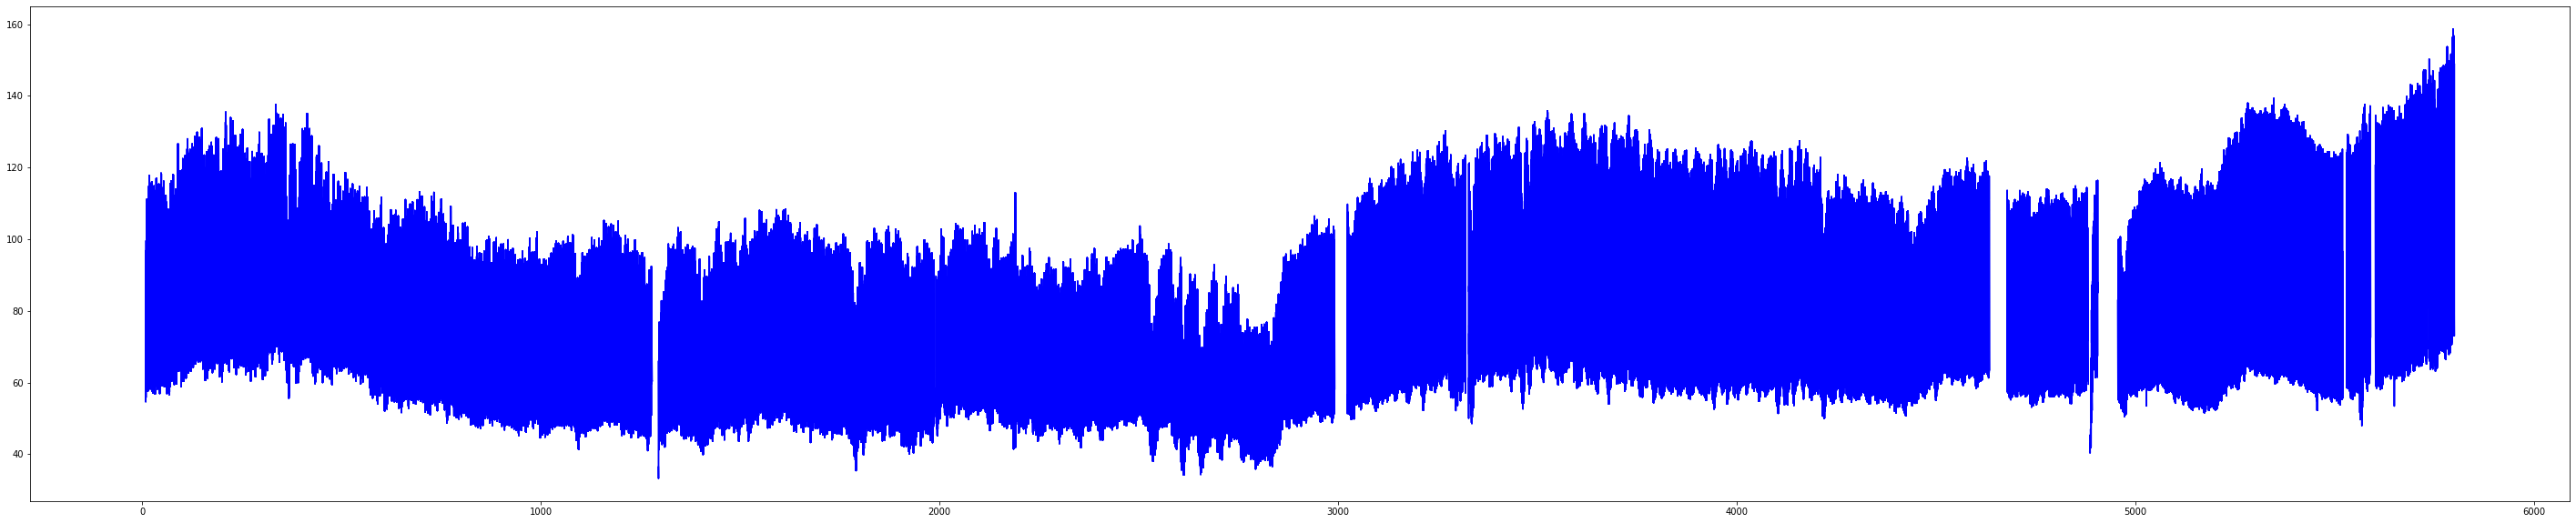

In [35]:
# mean_d0 = []
for i in tqdm(range(wdarray.shape[0])):
    d0 = wdarray[i,44:44+1024] 
    t0 = int(wdarray[i,0])
    svv = [None for _ in range(999)]
    svv.append(wdarray[i,31])
    svv_sub = [None for j in range(24)]
    svv = svv + svv_sub
    
    tt = np.arange(len(d0))/100 + t0 - wdarray[0,0]

    c = np.zeros(10)

    for j in range(0,10):
        d1 = d0[j*100:(j+1)*100]
        t1 = tt[j*100:(j+1)*100]
        d1_0 = d1[0]
        d1_1 = d1[-1]
        y = (d1_1-d1_0) * (t1-t1[0]) + d1_0

        c[j] = np.sum((d1-y)**2)

    max1 = np.max(d0[:200])
    min1 = np.min(d0[:200])
    max2 = np.max(d0[200:400])
    min2 = np.min(d0[200:400])
    max3 = np.max(d0[400:600])
    min3 = np.min(d0[400:600])
    max4 = np.max(d0[600:800])
    min4 = np.min(d0[600:800])
    max5 = np.max(d0[800:])
    min5 = np.min(d0[800:])

    arr = [max1-min1, max2-min2, max3-min3, max4-min4, max5-min5]

    dx = np.sum(arr)    
    
    
    if np.min(d0[:]) < 30 or np.max(d0[:]) > 250 or np.max(np.abs(d0[1:]-d0[:-1])) > 15 or np.any(c<=100) or dx < 10:
        continue
    else:
        subset.append(np.max(np.abs(d0[1:]-d0[:-1])))
        plt.plot(tt, d0, color = 'b')
    plt.plot(tt, d0, color = 'b')

# FFT

[0.00000000e+00 9.76562500e-02 1.95312500e-01 ... 9.97070312e+01
 9.98046875e+01 9.99023438e+01]


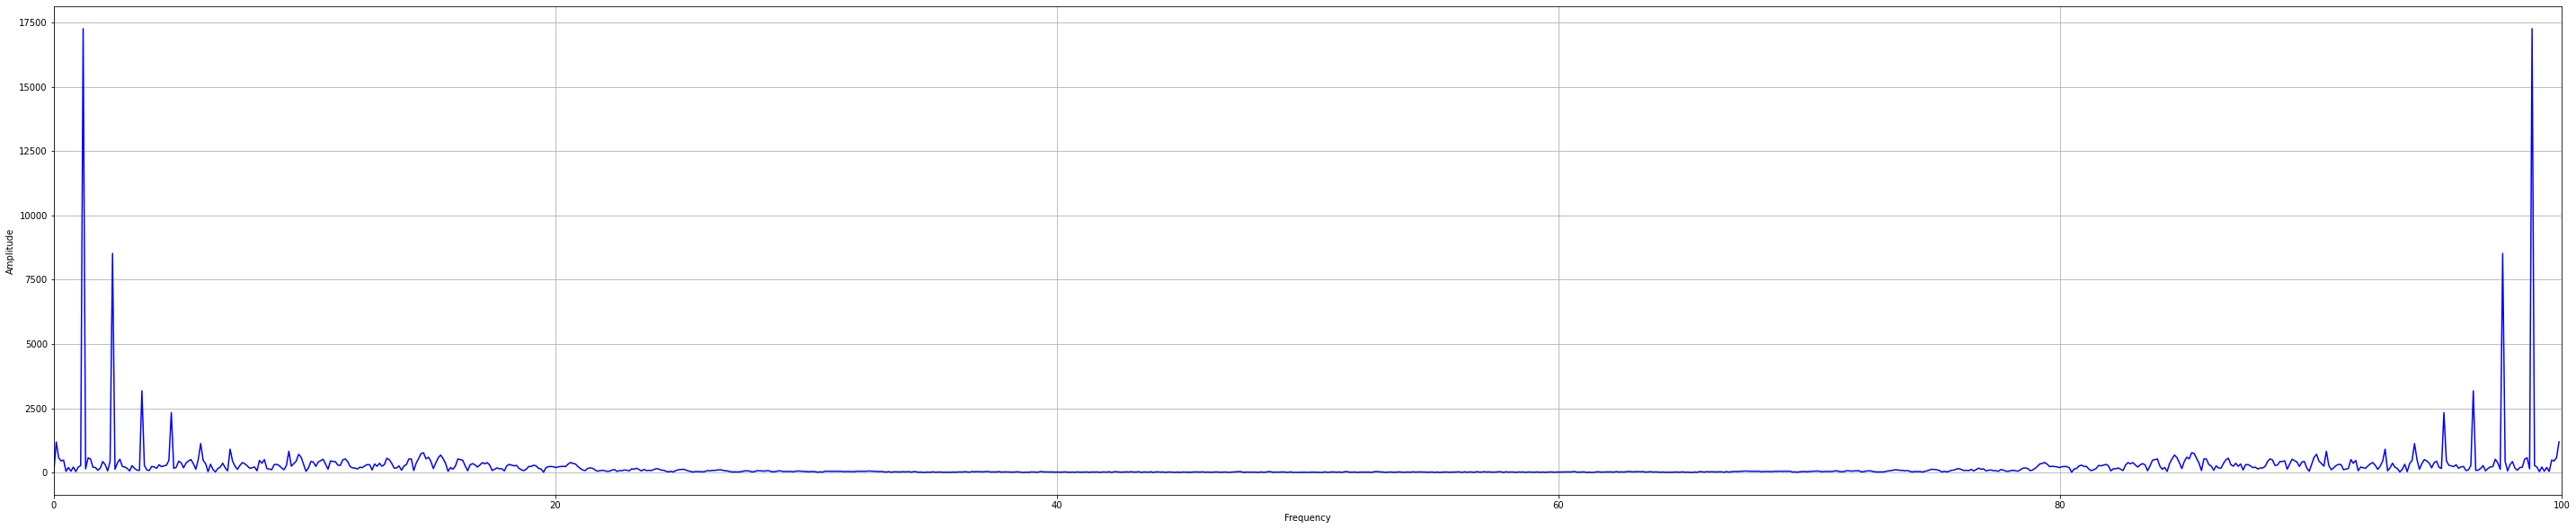

In [36]:
Fs = 100.
Ts = 1 / Fs
te = 1.0

N = len(d0)

k = np.arange(N)
T = N / Fs
freq = k / T
freq = freq[range(int(N))]

# FFT 적용
yfft = np.fft.fft(d0-np.mean(d0))
yf = yfft / N
yf = yf[range(int(N/2))]
plt.rcParams["figure.figsize"] = (50,10)

# FFT 출력
plt.plot(freq, abs(yfft), 'b')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.xlim(0, Fs)
plt.grid()
plt.show()

# Spectrogram

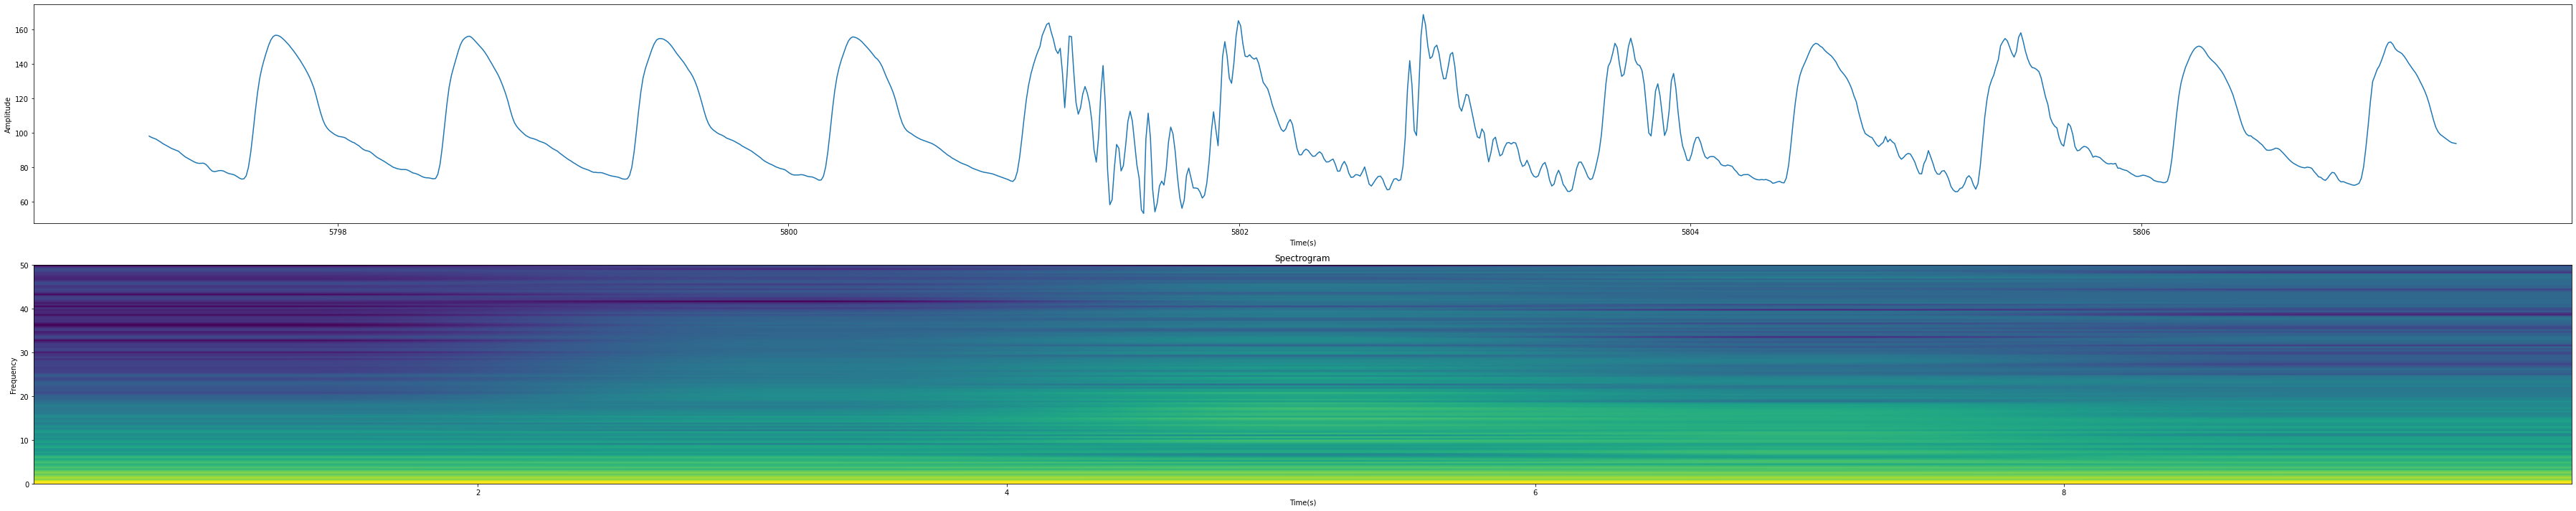

In [37]:
fig, (ax1, ax2) = plt.subplots(nrows=2)

ax1.plot(tt, d0)
ax1.set_xlabel('Time(s)')
ax1.set_ylabel('Amplitude')
fig.tight_layout()

Pxx, freqs, bins, im = ax2.specgram(d0, NFFT=256, Fs=Fs, noverlap=int(128 * 0.5))
ax2.set_title('Spectrogram')
ax2.set_xlabel('Time(s)')
ax2.set_ylabel('Frequency')
fig.tight_layout()

plt.show()

# 이전 beat와의 차

(array([   5.,    4.,    0.,   97.,  221., 1217.,  974.,  672.,  743.,
         496.,  502.,  272.,   44.,   57.,   36.,   16.,   22.,   28.,
          40.,   20.]),
 array([ 0.24 ,  0.971,  1.702,  2.433,  3.164,  3.895,  4.626,  5.357,
         6.088,  6.819,  7.55 ,  8.281,  9.012,  9.743, 10.474, 11.205,
        11.936, 12.667, 13.398, 14.129, 14.86 ]),
 <BarContainer object of 20 artists>)

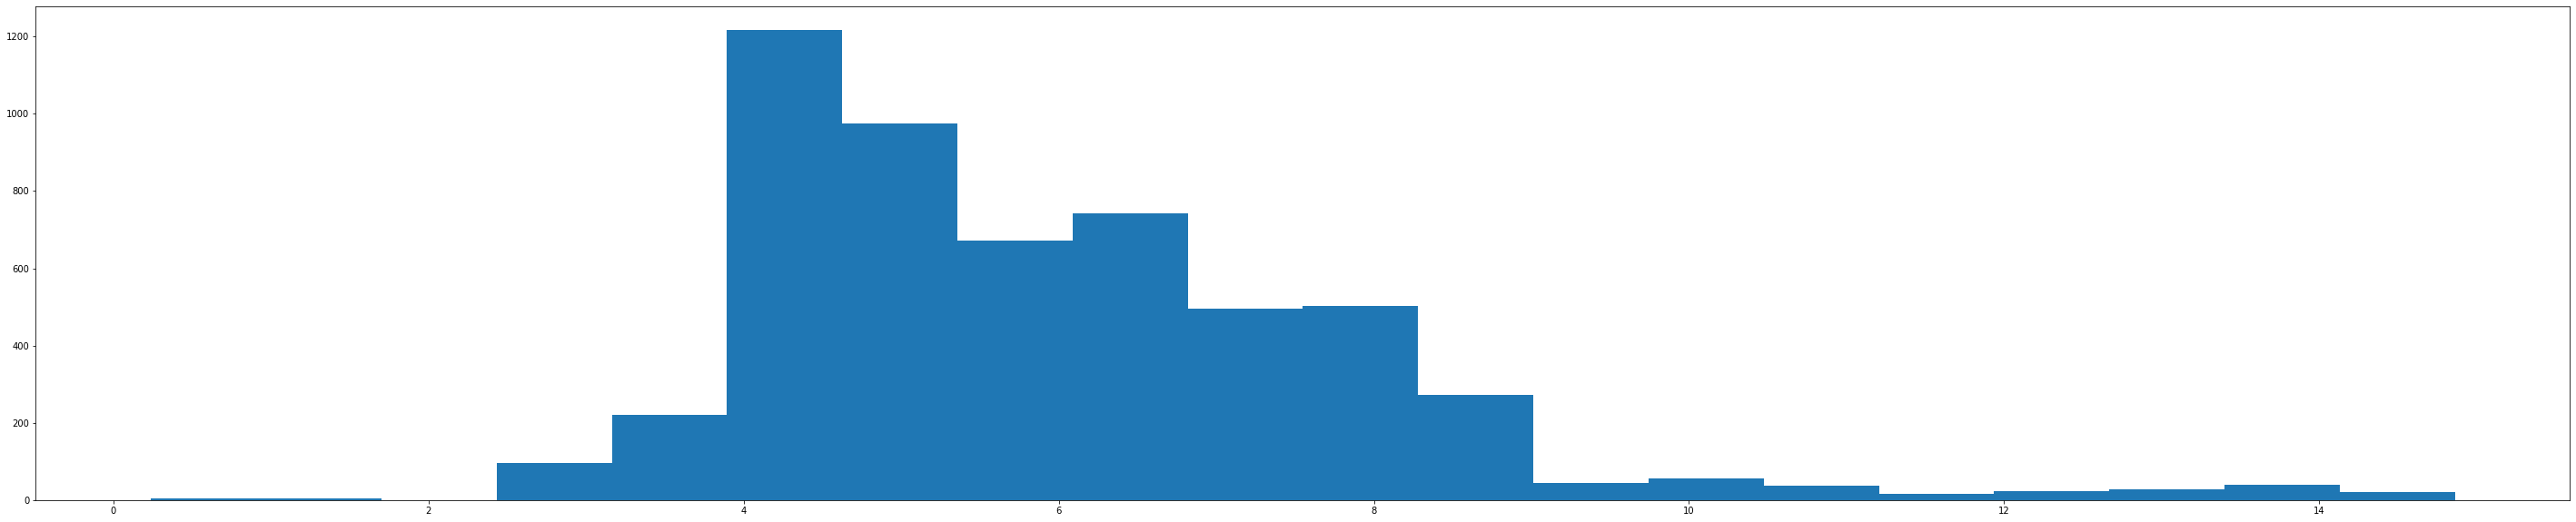

In [38]:
plt.hist(subset, bins=20)

# 데이터 보기

(11544, 1000, 1)
(11544, 1000, 1)
(11544, 1000, 1)


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


(11544, 1000, 3)


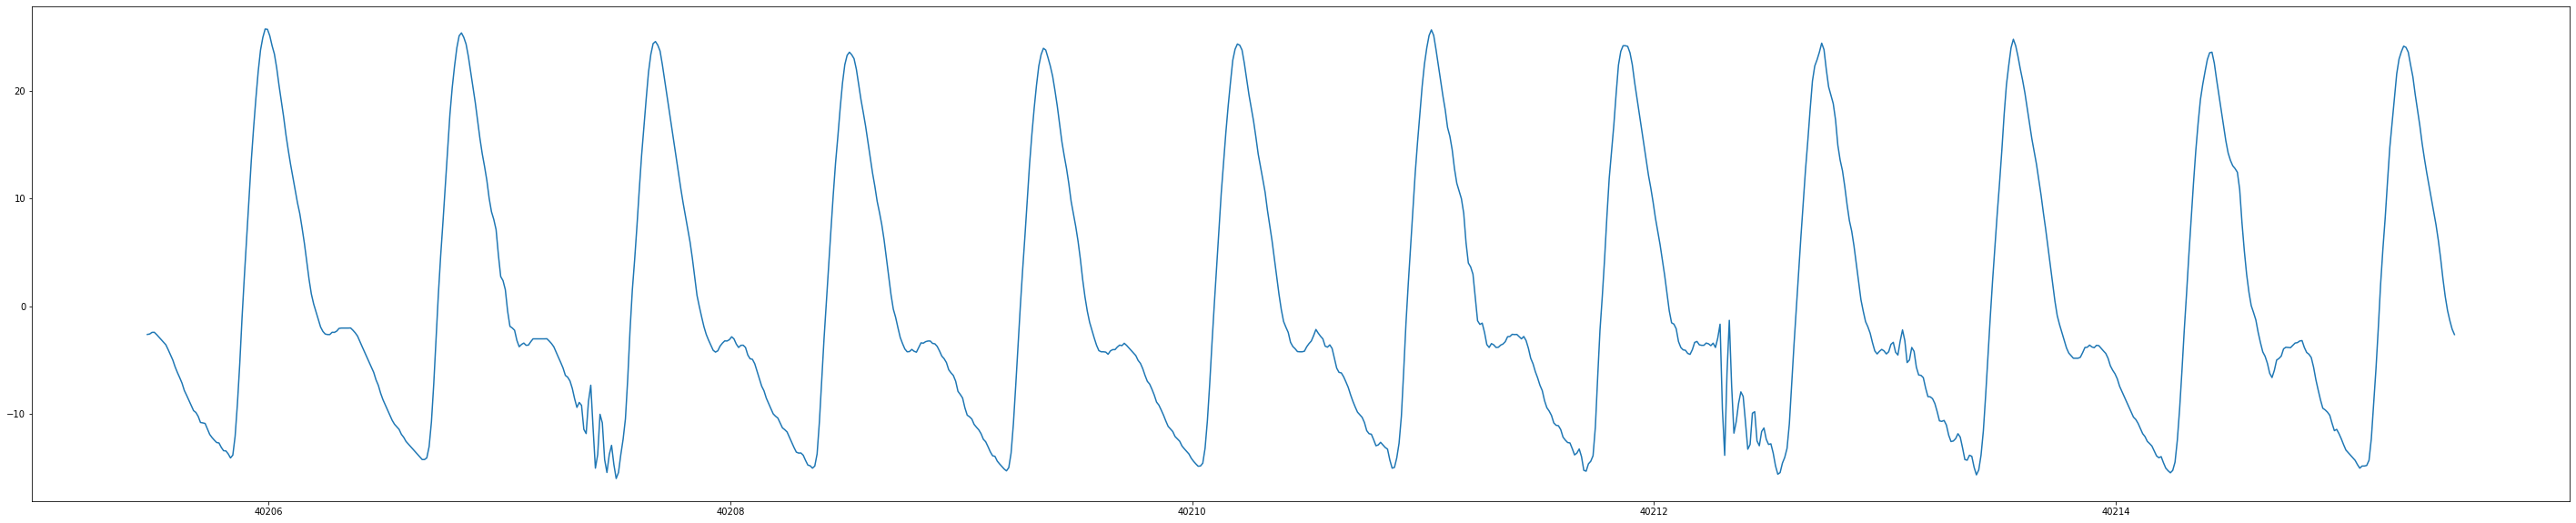

In [39]:
filepath = '/home/projects/pcg_transform/Research/old/pcg_AI/ml/Data/Preprocessed/VG/'

filenames = ['D-06_181008.csv']
cnt = 0
data = []
real_data = []
y_data = []
ppv_data = []
time = []

for filename in filenames:
    plt.figure(figsize=(50,10))

    wd = pd.read_csv(os.path.join(filepath,filename), engine='python')
    tmp_y_data = np.array(wd[['EV_SVV']])
    tmp_ppv_data = np.array(wd[['GE_PPV']])
    wd = np.array(wd)

    if len(wd) == 0:
        continue

    #테스트 1000개 데이터,(10초)
    for i in range(900, len(wd) - 900):
        abp_data = wd[i,-1024:-24]
        c = np.zeros(10)
        t0 = int(wd[i,0])
        tt = np.arange(len(abp_data))/100 + t0 - wd[0,0] 

        for j in range(0,10):
            d1 = abp_data[j*100:(j+1)*100]
            t1 = tt[j*100:(j+1)*100]
            d1_0 = d1[0]
            d1_1 = d1[-1]
            y = (d1_1-d1_0) * (t1-t1[0]) + d1_0

            c[j] = np.sum((d1-y)**2)
            
        max1 = np.max(abp_data[:200])
        min1 = np.min(abp_data[:200])
        max2 = np.max(abp_data[200:400])
        min2 = np.min(abp_data[200:400])
        max3 = np.max(abp_data[400:600])
        min3 = np.min(abp_data[400:600])
        max4 = np.max(abp_data[600:800])
        min4 = np.min(abp_data[600:800])
        max5 = np.max(abp_data[800:])
        min5 = np.min(abp_data[800:])

        arr = [max1-min1, max2-min2, max3-min3, max4-min4, max5-min5]
        
        dx = np.sum(arr)
        if np.min(abp_data[:]) < 30 or np.max(abp_data[:])>250 or np.max(np.abs(abp_data[1:]-abp_data[:-1])) > 15 or np.any(c<=100) or dx < 10 or tmp_y_data[i] < 1 or tmp_ppv_data[i] < 1:
            continue
            
        abp_fft = np.fft.fft(abp_data, 1000)
        abp_fft[0] = 0
        abp_data = np.fft.ifft(abp_fft)
        
        if np.std(abp_data) < 8 or np.std(abp_data)>45:
            continue
            
        abp_data = abp_data.reshape([len(abp_data),1])
        abp_data = abp_data.flatten()
        data.append(abp_data)
        y_data.append(tmp_y_data[i])
        ppv_data.append(tmp_ppv_data[i])

    fft_data = []
    dpdt = []
    zfft_data = []
    for j in range(len(data)):
        tmp_data = []

        for k in range(10):
            tmp_fft = np.abs(np.fft.fft(data[j][k:k + 100], 100))
            tmp_fft[0] = 0
            tmp_fft = np.fft.fftshift(tmp_fft)
            tmp_data.append(tmp_fft)

        tmp_dpdt = np.diff(data[j].flatten(), 1)
        tmp_dpdt = np.append(tmp_dpdt, 0)
        tmp_dpdt.flatten()
        dpdt.append(tmp_dpdt)

        tmp_data = np.array(tmp_data)
        tmp_data = tmp_data.flatten()
        fft_data.append(tmp_data)

        zfft = np.abs(np.fft.fft(data[j], 4096))
        zfft[0] = 0
        zfft = np.fft.fftshift(zfft)
        zfft = zfft[len(zfft)//2-500:len(zfft)//2+500]

        zfft_data.append(zfft)

    fft_data = np.array(fft_data)
    fft_data = np.reshape(fft_data, [len(fft_data), 1000, 1])

    zfft_data = np.array(zfft_data)
    zfft_data = np.reshape(zfft_data, [len(zfft_data), 1000, 1])

    dpdt = np.array(dpdt)
    dpdt = np.reshape(dpdt, [len(dpdt), 1000, 1])

    data = np.array(data)
    data = np.reshape(data, [len(data), 1000, 1])
    
    print(data.shape)
    print(dpdt.shape)
    print(fft_data.shape)
    plt.plot(tt, data[0,:])
        
    data = np.dstack([data, dpdt, zfft_data])
    print(data.shape)

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


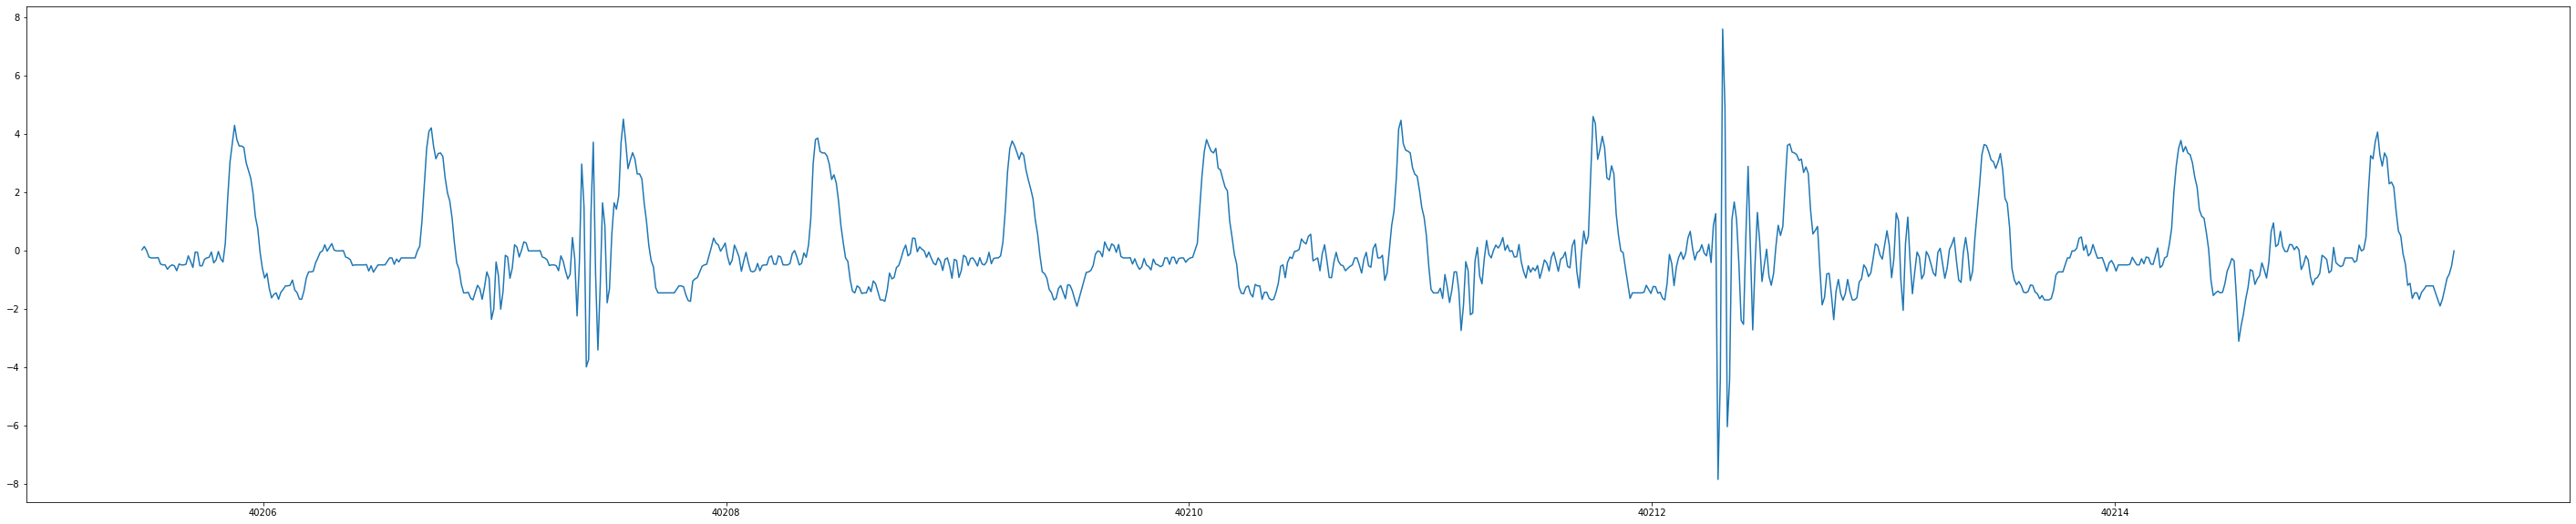

In [40]:
plt.figure(figsize=(50,10))
plt.plot(tt, dpdt[0,:])

1000


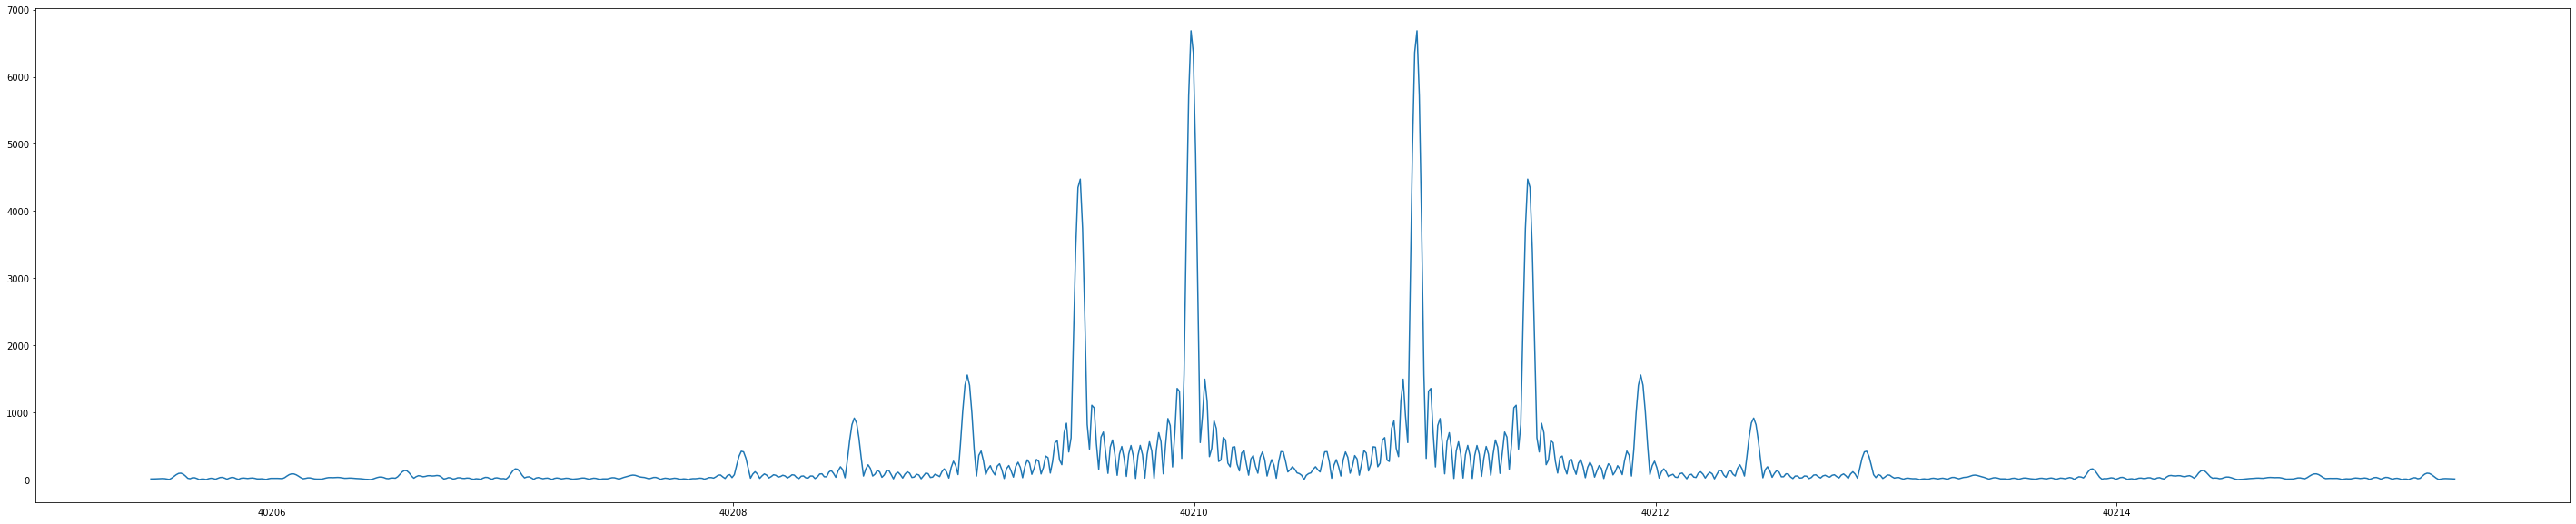

In [41]:
plt.figure(figsize=(50,10))
plt.plot(tt, zfft_data[0,:])
print(len(zfft_data[0,:]))

(11544,)


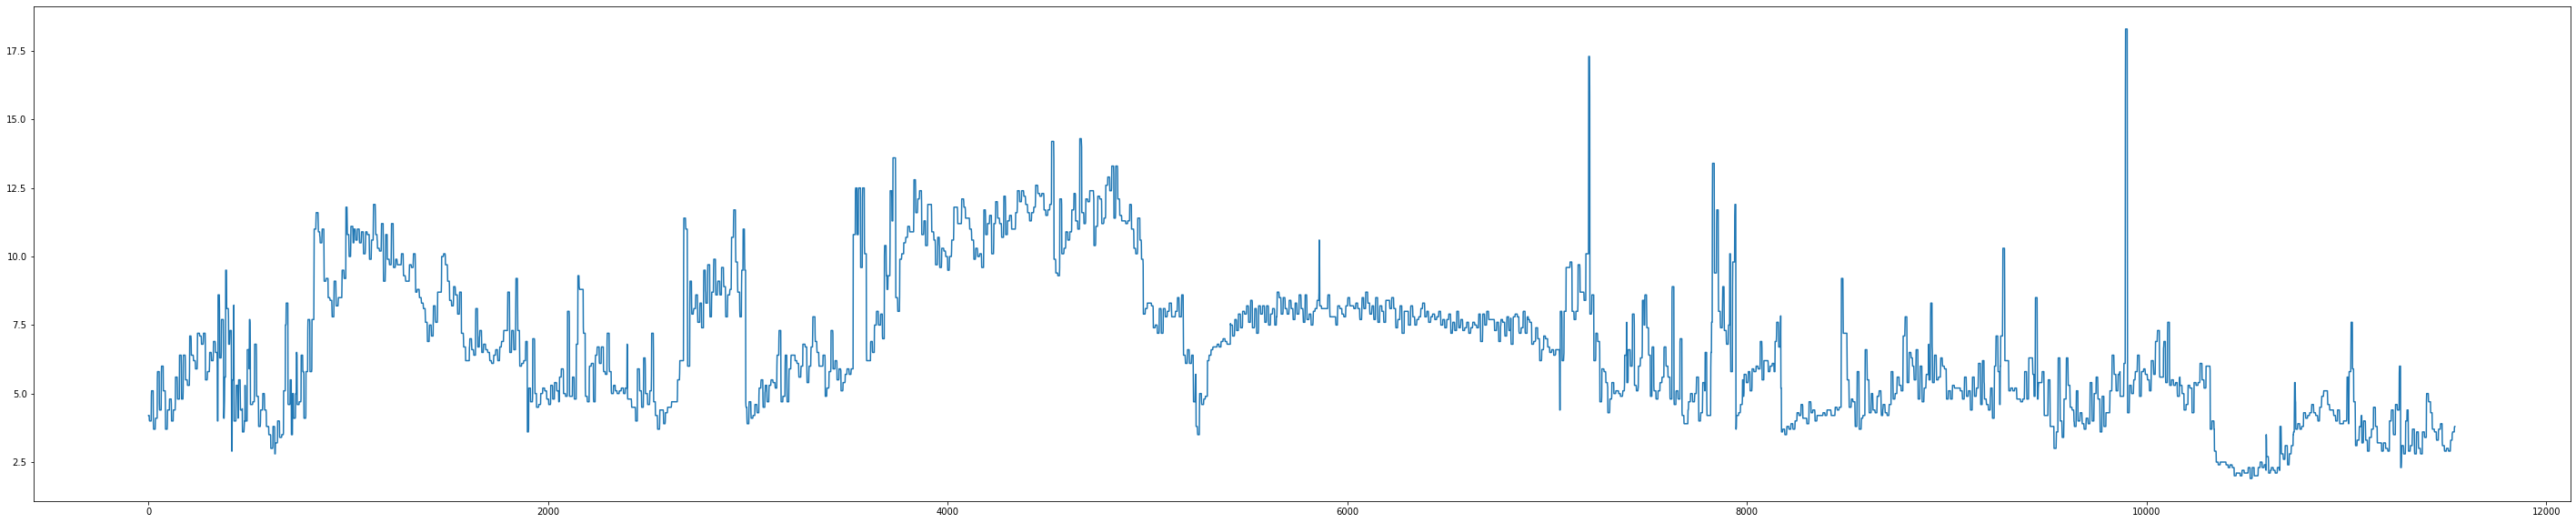

In [42]:
plt.figure(figsize=(50,10))
print(np.array(y_data).flatten().shape)
plt.plot(np.array(y_data).flatten()[:])

# 데이터 추출

In [43]:
def save_abp_svv_10sec(filepath, file):
    cnt = 0
    data = []
    y_data = []
    ppv_data = []
    time = []

    wd = pd.read_csv(os.path.join(filepath,file), engine='python')
    tmp_y_data = np.array(wd[['EV_SVV']])
    tmp_ppv_data = np.array(wd[['GE_PPV']])
    wd = np.array(wd)

    if len(wd) == 0:
        return [], [], []

    for i in range(900, len(wd) - 900):
        abp_data = wd[i,-1024:-24]

        c = np.zeros(10)
        t0 = int(wd[i,0])
        tt = np.arange(len(abp_data))/100 + t0 - wd[0,0] 

        for j in range(0,10):
            d1 = abp_data[j*100:(j+1)*100]
            t1 = tt[j*100:(j+1)*100]
            d1_0 = d1[0]
            d1_1 = d1[-1]
            y = (d1_1-d1_0) * (t1-t1[0]) + d1_0

            c[j] = np.sum((d1-y)**2)
            
        max1 = np.max(abp_data[:200])
        min1 = np.min(abp_data[:200])
        max2 = np.max(abp_data[200:400])
        min2 = np.min(abp_data[200:400])
        max3 = np.max(abp_data[400:600])
        min3 = np.min(abp_data[400:600])
        max4 = np.max(abp_data[600:800])
        min4 = np.min(abp_data[600:800])
        max5 = np.max(abp_data[800:])
        min5 = np.min(abp_data[800:])

        arr = [max1-min1, max2-min2, max3-min3, max4-min4, max5-min5]
        
        dx = np.sum(arr)
        if np.min(abp_data[:]) < 10 or np.max(abp_data[:])>250 or np.max(np.abs(abp_data[1:]-abp_data[:-1])) > 15 or np.any(c<=100) or dx < 10 or tmp_y_data[i] < 1 or tmp_ppv_data[i] < 1:
            continue
            
        abp_fft = np.fft.fft(abp_data, 1000)
        abp_fft[0] = 0
        abp_data = np.fft.ifft(abp_fft)
        
        if np.std(abp_data) < 8 or np.std(abp_data)>45:
            continue
            
        abp_data = abp_data.reshape([len(abp_data),1])
        abp_data = abp_data.flatten()
        data.append(abp_data)
        y_data.append(tmp_y_data[i])
        ppv_data.append(tmp_ppv_data[i])

    fft_data = []
    dpdt = []
    zfft_data = []
    for j in range(len(data)):
        tmp_data = []

        for k in range(10):
            tmp_fft = np.abs(np.fft.fft(data[j][k:k + 100], 100))
            tmp_fft[0] = 0
            tmp_fft = np.fft.fftshift(tmp_fft)
            tmp_data.append(tmp_fft)

        tmp_dpdt = np.diff(data[j].flatten(), 1)
        tmp_dpdt = np.append(tmp_dpdt, 0)
        tmp_dpdt.flatten()
        dpdt.append(tmp_dpdt)

        tmp_data = np.array(tmp_data)
        tmp_data = tmp_data.flatten()
        fft_data.append(tmp_data)

        zfft = np.abs(np.fft.fft(data[j], 4096))
        zfft[0] = 0
        zfft = np.fft.fftshift(zfft)
        zfft = zfft[len(zfft)//2-500:len(zfft)//2+500]

        zfft_data.append(zfft)

    fft_data = np.array(fft_data)
    fft_data = np.reshape(fft_data, [len(fft_data), 1000, 1])

    zfft_data = np.array(zfft_data)
    zfft_data = np.reshape(zfft_data, [len(zfft_data), 1000, 1])

    dpdt = np.array(dpdt)
    dpdt = np.reshape(dpdt, [len(dpdt), 1000, 1])

    data = np.array(data)
    data = np.reshape(data, [len(data), 1000, 1])
    
    data = np.dstack([data, dpdt, zfft_data])
    return data, np.array(y_data).flatten(), np.array(ppv_data).flatten(), fft_data

In [44]:
filepath = '/home/projects/pcg_transform/Research/old/pcg_AI/ml/Data/Preprocessed/VG/'
filenames = os.listdir(filepath)
filenames.sort()

cnt = 0
wrong_data = 0
room = []
room1 = []
room3 = []
room4 = []
room5 = []
file_cnt1 = 0
file_cnt3 = 0
file_cnt4 = 0
file_cnt5 = 0
for filename in tqdm(filenames):
    if filename[2:4] == '01':
        room1.append(filename)
        file_cnt1 += 1
    elif filename[2:4] == '03':
        room3.append(filename)
        file_cnt3 += 1
    elif filename[2:4] == '04':
        room4.append(filename)
        file_cnt4 += 1
    elif filename[2:4] == '05':
        room5.append(filename)
        file_cnt5 += 1
    else:
        continue
room = [room1, room3, room4, room5]
print(file_cnt1, file_cnt3, file_cnt4, file_cnt5, file_cnt1+file_cnt3+file_cnt4+file_cnt5)

100%|██████████| 719/719 [00:00<00:00, 646314.74it/s]

90 6 97 116 309


In [45]:
plus1 = []
plus2 = []
plus3 = []
for room_num in room:
    standard = 0
    
    for filename in tqdm(room_num):
        data, svv, ppv, _ = save_abp_svv_10sec(filepath, filename)
        if (len(data) == 0) or (len(svv) == 0):
            wrong_data += 1
            standard += 1
            continue
        else:
            if standard < (len(room_num) * 0.8):
                line = str(cnt) + ' train ' + filename + '\n'
                plus1.append(data.shape[0])
                np.save('/srv/project_data/SV_sanghyun/base_ppv/train/data_'+str(cnt)+'.npy', data)
                np.save('/srv/project_data/SV_sanghyun/base_ppv/train/svv_'+str(cnt)+'.npy', svv)
                np.save('/srv/project_data/SV_sanghyun/base_ppv/train/ppv_'+str(cnt)+'.npy', ppv)
            elif standard < (len(room_num) * 0.9) and standard >= (len(room_num) * 0.8):
                line = str(cnt) + ' val ' + filename + '\n'
                plus2.append(data.shape[0])
                np.save('/srv/project_data/SV_sanghyun/base_ppv/val/data_'+str(cnt)+'.npy', data)
                np.save('/srv/project_data/SV_sanghyun/base_ppv/val/svv_'+str(cnt)+'.npy', svv)
                np.save('/srv/project_data/SV_sanghyun/base_ppv/val/ppv_'+str(cnt)+'.npy', ppv)
            elif standard >= (len(room_num) * 0.9):
                line = str(cnt) + ' test ' + filename + '\n'
                plus3.append(data.shape[0])
                np.save('/srv/project_data/SV_sanghyun/base_ppv/test/data_'+str(cnt)+'.npy', data)
                np.save('/srv/project_data/SV_sanghyun/base_ppv/test/svv_'+str(cnt)+'.npy', svv)
                np.save('/srv/project_data/SV_sanghyun/base_ppv/test/ppv_'+str(cnt)+'.npy', ppv)
        cnt += 1
        standard += 1
print(sum(plus1))
print(sum(plus2))
print(sum(plus3))

100%|██████████| 116/116 [12:58<00:00,  6.71s/it]

949506
153381
152390


In [46]:
path = '/srv/project_data/SV_sanghyun/base_ppv/val/'
val_files = os.listdir(path)

val_data = []
val_svv = []
val_ppv = []

cnt = 0
for val_file in tqdm(val_files):
    if val_file != '.ipynb_checkpoints' and cnt < 60 and val_file.startswith('data'):
        num = val_file.split('.')[0][5:]
        name_data = 'data_' + str(num) + '.npy'
        name_svv = 'svv_' + str(num) + '.npy'
        name_ppv = 'ppv_' + str(num) + '.npy'
        data = np.load(os.path.join(path, name_data))
        for i in range (len(data)):
            val_data.append(data[i])
        svv = np.load(os.path.join(path, name_svv))
        for i in range (len(svv)):
            val_svv.append(svv[i])
        ppv = np.load(os.path.join(path, name_ppv))
        for i in range (len(ppv)):
            val_ppv.append(ppv[i])
        cnt += 1
    else:
        continue
val_data = np.asarray(val_data)
print(val_data.shape)
data_path = '/srv/project_data/SV_sanghyun/base_ppv/val_data.txt'
with open(data_path, 'wb') as ABP_data:
    pickle.dump(val_data, ABP_data, protocol=4)

val_svv = np.asarray(val_svv)
print(val_svv.shape)
svv_path = '/srv/project_data/SV_sanghyun/base_ppv/val_svv.txt'
with open(svv_path, 'wb') as SVV_data:
    pickle.dump(val_svv, SVV_data, protocol=4)
    
val_ppv = np.asarray(val_ppv)
print(val_ppv.shape)
ppv_path = '/srv/project_data/SV_sanghyun/base_ppv/val_ppv.txt'
with open(ppv_path, 'wb') as PPV_data:
    pickle.dump(val_ppv, PPV_data, protocol=4)
print("finish")

100%|██████████| 79/79 [24:58<00:00, 18.97s/it] 


(153381, 1000, 3)
(153381,)
(153381,)
finish


In [ ]:
# for filename in tqdm(filenames):
#     line = ''
#     if filename =='.ipynb_checkpoints' or filename[2:4] == '02' or filename[2:4] == '06':
#         continue
#     data, svv, _ = save_abp_svv_10sec(filepath, filename)
#     if (len(data) == 0) or (len(svv) == 0):
#         wrong_data += 1
#         standard += 1
#         continue
#     else:
#         if standard < 218:
#             line = str(cnt) + ' train ' + filename + '\n'
# #             np.save('/srv/project_data/SV_sanghyun/base/train/data_'+str(cnt)+'.npy', data)
# #             np.save('/srv/project_data/SV_sanghyun/base/train/svv_'+str(cnt)+'.npy', svv)
#         elif standard < 249 and standard >= 218:
#             line = str(cnt) + ' val ' + filename + '\n'
# #             np.save('/srv/project_data/SV_sanghyun/base/val/data_'+str(cnt)+'.npy', data)
# #             np.save('/srv/project_data/SV_sanghyun/base/val/svv_'+str(cnt)+'.npy', svv)
#             continue
#         elif standard >= 249:
#             line = str(cnt) + ' test ' + filename + '\n'
# #             np.save('/srv/project_data/SV_sanghyun/base/test/data_'+str(cnt)+'.npy', data)
# #             np.save('/srv/project_data/SV_sanghyun/base/test/svv_'+str(cnt)+'.npy', svv)
# #         f.write(line)
#             continue
#         cnt += 1
#         standard += 1
# # f.close()
# # plt.show()
# print("wrong_data: ", wrong_data)

In [28]:
pwd

'/home/sanghyunkim/SV/base_model_version_2'